<a href="https://colab.research.google.com/github/cagBRT/computer-vision/blob/master/faceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!git clone -l -s https://github.com/opencv/opencv.git 
!pwd

fatal: destination path 'opencv' already exists and is not an empty directory.
/content/cloned-repo/cloned-repo/cloned-repo


In [ ]:
# Clone the entire repo.
!git clone -l -s https://github.com/cagBRT/computer-vision.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 92 (delta 36), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (92/92), done.
/content/cloned-repo/cloned-repo/cloned-repo
drawing.ipynb	 opencv1.ipynb	opencv5.ipynb  opencv9a.ipynb	   README.md
images		 opencv2.ipynb	opencv6.ipynb  opencv9.ipynb
opencv10a.ipynb  opencv3.ipynb	opencv7.ipynb  opencvKMeans.ipynb
opencv10.ipynb	 opencv4.ipynb	opencv8.ipynb  PassportScan.ipynb


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

create class to detect faces

use the built-in Haar cascade classifiers in OpenCV. these classifiers have already been pre-trained to recognize faces!

these classifiers work by scanning an image from left to right, and top to bottom, at varying scale sizes. Scan- ning an image from left to right and top to bottom is called the “sliding window” approach.
As the window moves from left to right and top to bot- tom, one pixel at a time, the classifier is asked whether or not it “thinks” there is a face in the current window, based on the parameters supplied to the classifier.


• scaleFactor: How much the image size is reduced at each image scale. This value is used to create the scale pyramid in order to detect faces at multiple scales in the image (some faces may be closer to the fore- ground, and thus be larger; other faces may be smaller and in the background, thus the usage of varying scales). A value of 1.05 indicates that Jeremy is re- ducing the size of the image by 5% at each level in the pyramid.<br>
• minNeighbors: How many neighbors each window should have for the area in the window to be consid- ered a face. The cascade classifier will detect multiple windows around a face. This parameter controls how many rectangles (neighbors) need to be detected for the window to be labeled a face.<br>
• minSize: A tuple of width and height (in pixels) in- dicating the minimum size of the window. Bounding boxes smaller than this size are ignored. It is a good idea to start with (30, 30) and fine-tune from there.


In [ ]:

class FaceDetector:
  def __init__(self, faceCascadePath):
    self.faceCascade = cv2.CascadeClassifier(faceCascadePath)
  def detect(self, image, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30)):
    rects = self.faceCascade.detectMultiScale(image, 
                                              scaleFactor = scaleFactor,
                                              minNeighbors = minNeighbors, 
                                              minSize = minSize, 
                                              flags = cv2.CASCADE_SCALE_IMAGE)
    return rects

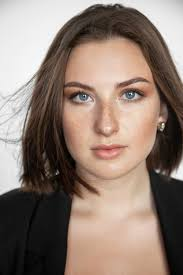

In [ ]:
image = cv2.imread("images/face.jpeg")
cv2_imshow(image)

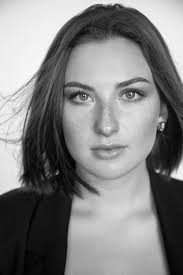

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
cascPath = r"C:\opencv\sources\data\haarcascades\haarcascade_frontalface_alt2.xml"
fd = FaceDetector("face")
faceRects = fd.detect(gray, 
                      scaleFactor = 1.1, 
                      minNeighbors = 5,
                      minSize = (30, 30))
print("I found {} face(s)".format(len(faceRects)))


error: ignored

In [ ]:
for (x, y, w, h) in faceRects:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2_imshow(image)

NameError: ignored